Check Python version

In [52]:
!python --version

Python 3.8.10


Import libraries

In [53]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Extract Data**

In [54]:
# Local directory
# data_dir = "../datasets/retail"
# file_name = "air_passengers"
# file_path = f"{data_dir}/{file_name}.csv"

# Through online GitHub
file_path = "https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/air_passengers.csv"

In [55]:
train_df = pd.read_csv(file_path)

In [56]:
train_df.shape

(144, 2)

In [57]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [58]:
train_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [59]:
train_df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


Change 'y' to float

In [60]:
train_df["y"] = train_df["y"].astype(float)

In [61]:
train_df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


Plot graph

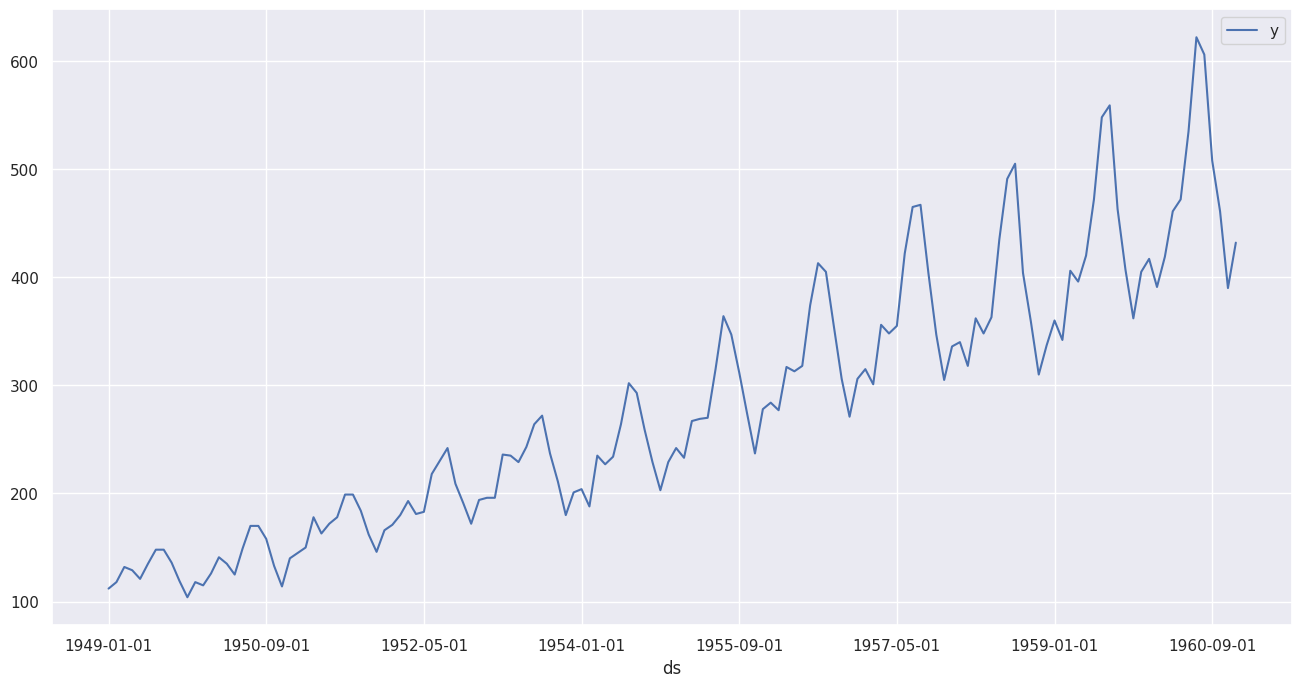

In [62]:
figsize = (16, 8)
train_df.set_index("ds").plot(figsize=figsize);

### **Train API**

Train data: convert df to list-of-list

In [63]:
train_data = []

In [64]:
for value in train_df.values:
    train_data.append(list(value))

In [65]:
train_data[:10]

[['1949-01-01', 112.0],
 ['1949-02-01', 118.0],
 ['1949-03-01', 132.0],
 ['1949-04-01', 129.0],
 ['1949-05-01', 121.0],
 ['1949-06-01', 135.0],
 ['1949-07-01', 148.0],
 ['1949-08-01', 148.0],
 ['1949-09-01', 136.0],
 ['1949-10-01', 119.0]]

Custom Model Request (optional)

In [66]:
custom_model_request_dict = {
    'type': 'meta_wa',
    'score': ['smape', 'mape'],
    'param': {
        'base_models': [
            {'type': 'darts_autoarima'},
            {'type': 'darts_autotheta'},
            {'type': 'darts_autoets'},
            {'type': 'stats_autotheta'}
        ]
    }
}

In [67]:
#custom_model_request = json.dumps(custom_model_request_dict)

Train API JSON Payload

In [68]:
api_json = {
    'data': train_data,
    'model': custom_model_request_dict,  # TODO: custom_model_request_dict returns empty JSON output
}

Build URL

In [69]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [70]:
# URL to our SYBIL AWS service
protocol = url_dict["protocol"]
host = url_dict["host"]
port = url_dict["port"]
endpoint = "train"

url = "%s://%s:%s/%s" % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [93]:
%%time
# TODO: gain a accredited cert and remove verify=False
response = requests.post(url, json=api_json, verify=False)

CPU times: user 6.4 ms, sys: 0 ns, total: 6.4 ms
Wall time: 53.8 ms


/home/joeshmoe/playground/sybil/venv/lib/python3.8/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sybil.tempor.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [72]:
train_json_out = response.json()  # dict output
# train_json_out = json.dumps(response.json())  # str output
# train_json_out = json.dumps(response.json(), indent=4)  # str output w tabs

In [73]:
train_json_out

{'model': 'AgEBCD64AAA4uAAA1ncAABgAAADMdwAAjg0AAD+AAGVsc02TjG8odJOMjG1vbnSURkFBlG5pcnMKaZRpjB8DYXJyYZSUchh5YYxhkyiUZGFyaW54dJRyYXJljG4ZYx9lZ2eTYXOMgUsGjIyTiIz//5RyZZQJbk6FlDFljBVvaR8MdGhyhVKUiQNK/12UlAJSTnRGhmxflHhveG54fWWUSx5LAwt0hoFoVJRLiWJSaAWMYlaUlIyUWZRLjJROSpQA4HcAH5QoY2FoeYYLbhN0bl+Mc3RsZWJlcE50YWV0YWWfZV90H3V0YV9mb3NlZWFfcmNhX3Nvc2VjYV9sbXJvbmWUDG8NGmwMboxkZW5llG5vgXSUZpNhEmhndXV0Y3aUc2A1FGx0YWx1coxllHNuaFdbS5SGdWOUcqAKH2FzTnJmdWFhbG+UAU6UX2EFAnIFApRyB5RyB5R0iW5jH5RpbV6Ub25ock6MC2FzX3NldHJsdG+MYXNwlGNoaW2UEJSUbEPOjJRDWwhmhSiU8JSUoVQflGloNpQUt5RyAAFllJRLiZ7kgk4cpooRl382EUrC0zofVSVqgvcDCDpM5lVzgI/9AP+rVFVRADmZVfJ5AKvX5FcfclWAfzrGsAUb441R5I6SyORjjXI0OXJxOHHkcztVqTofNnGNHVmBxqtXxjodAKksOa5V5MzJ48XGjsaNN404jeIfqxs4xqp8VzcccOPixoAdEVWUlG9uAACUjGiHAdWUZUsGUpSUYYUomuEE+gKMS1LiBgwElGiHDhDgBCMflGhoAZoAlCSmbQ290rAjp7X4CJSAant0rsQf6cBdsh4fsSR/+8wo67Yc3BPL9sPTpoJ1jVfpqNEOBJ/wESVtJisfli0NSt32k/9NBeMNN3WKfkHXj0MZvlYWYr2ZKOFEnJ4fzhOQaOmO/9IISh3vw6WGdEUerwU9sMdBE1cSB7cchcQf1h6qIy0I/JaHaSyQwuAsf

### **Forecast API**

Forecast Dates: predict the next 2 years of air passenger data (1961-1962)

In [74]:
dates = [
    "1961-01-01", "1961-02-01", "1961-03-01", "1961-04-01", "1961-05-01", "1961-06-01",
    "1961-07-01", "1961-08-01", "1961-09-01", "1961-10-01", "1961-11-01", "1961-12-01",
    "1962-01-01", "1962-02-01", "1962-03-01", "1962-04-01", "1962-05-01", "1962-06-01",
    "1962-07-01", "1962-08-01", "1962-09-01", "1962-10-01", "1962-11-01", "1962-12-01",
]

Model from Train API

In [75]:
model = train_json_out["model"]

Forecast API JSON Payload

In [76]:
api_json = {
    'model': model,
    'predicts': dates
}

Build URL (same as train except for the endpoint)

In [77]:
endpoint = "forecast"

url = "%s://%s:%s/%s" % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [78]:
%%time
# TODO: gain a accredited cert and remove verify=False
response = requests.post(url, json=api_json, verify=False)

CPU times: user 3.05 ms, sys: 1.86 ms, total: 4.91 ms
Wall time: 63.2 ms


/home/joeshmoe/playground/sybil/venv/lib/python3.8/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sybil.tempor.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [79]:
forecast_json_out = response.json()  # dict output
# forecast_json_out = json.dumps(response.json())  # str output
# forecast_json_out = json.dumps(response.json(), indent=4)  # str output w tabs

In [80]:
forecast_json_out

{'data': [410.25036415272007,
  358.70750773438374,
  398.27532688916705,
  408.95007618100317,
  398.93767855305697,
  460.42979812910926,
  445.7552302021017,
  454.6255710815556,
  513.5413394867066,
  574.132549667377,
  575.8489082225075,
  497.9835596319101,
  440.71801812389083,
  387.6275700435737,
  428.45262908905954,
  439.26796304827616,
  428.9674811777282,
  492.1252588609085,
  476.93737359139334,
  485.8024220466014,
  546.4257531150004,
  608.4245599431467,
  610.0320557447648,
  530.2228332709298]}

Combine forecast dates and output

In [81]:
forecast_data = list(zip(dates, forecast_json_out["data"]))
forecast_df = pd.DataFrame(forecast_data, columns = ["ds", "y"])

In [82]:
forecast_df.shape

(24, 2)

In [83]:
forecast_df.columns

Index(['ds', 'y'], dtype='object')

In [84]:
forecast_df.head()

,ds,y
0,1961-01-01,410.250364
1,1961-02-01,358.707508
2,1961-03-01,398.275327
3,1961-04-01,408.950076
4,1961-05-01,398.937679


In [85]:
forecast_df.tail()

,ds,y
19,1962-08-01,485.802422
20,1962-09-01,546.425753
21,1962-10-01,608.424560
22,1962-11-01,610.032056
23,1962-12-01,530.222833


Plot train and forecast side-by-side

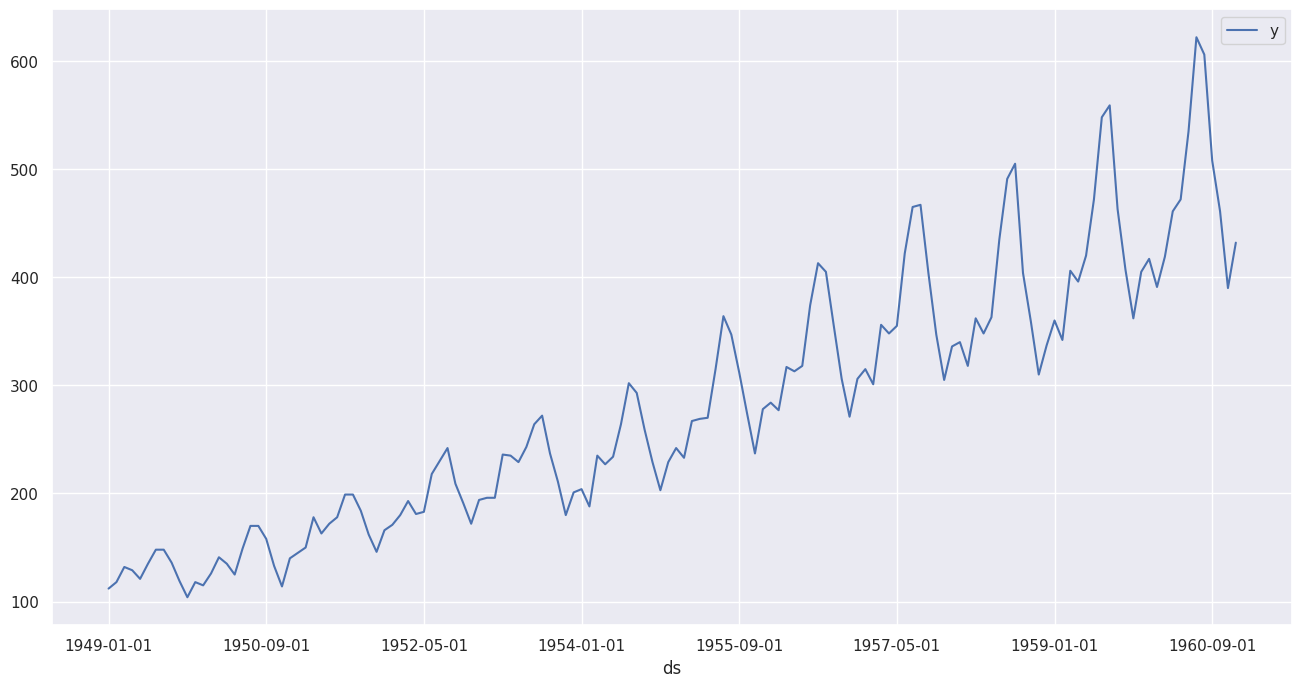

In [86]:
train_df["color"] = "b"
train_df.set_index("ds").plot(figsize=figsize, color=train_df["color"]);

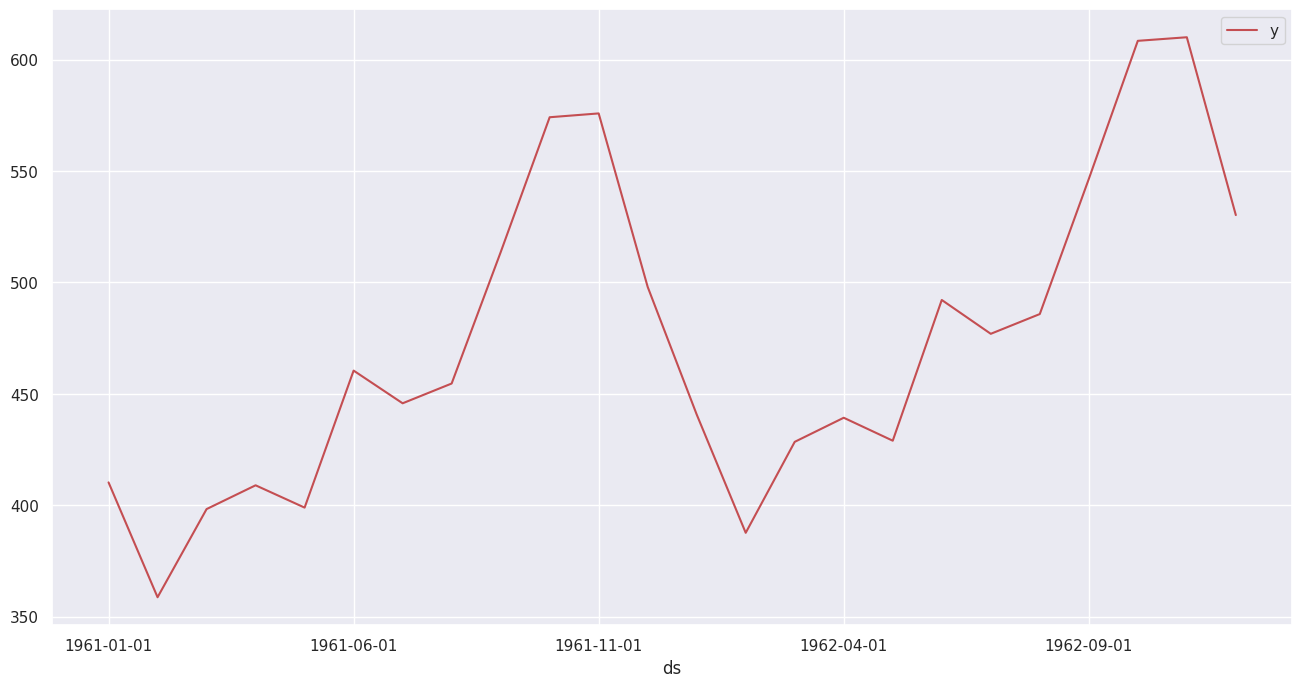

In [87]:
forecast_df["color"] = "r"
forecast_df.set_index("ds").plot(figsize=figsize, color=forecast_df["color"]);

Combine train and test sets

In [88]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [89]:
df.shape

(168, 3)

In [90]:
df.head()

,ds,y,color
0,1949-01-01,112.0,b
1,1949-02-01,118.0,b
2,1949-03-01,132.0,b
3,1949-04-01,129.0,b
4,1949-05-01,121.0,b


In [91]:
df.tail()

,ds,y,color
163,1962-08-01,485.802422,r
164,1962-09-01,546.425753,r
165,1962-10-01,608.424560,r
166,1962-11-01,610.032056,r
167,1962-12-01,530.222833,r


Plot combined train and test sets with the vertical black line as the cut-off

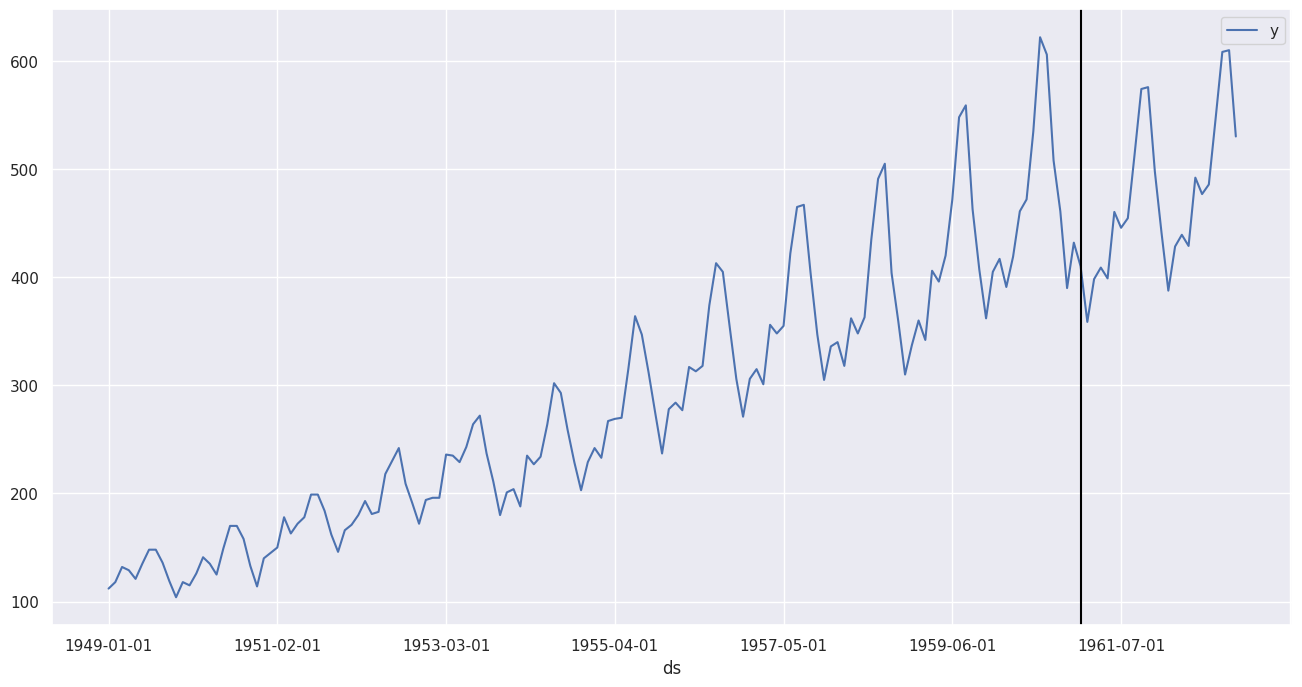

In [92]:
df.set_index("ds").plot(figsize=figsize, color=df["color"])
plt.axvline(x=len(train_df), color='black', label ='Train/Test set cut-off')
plt.show();